In [1]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

# Limit Theorems

In many cases, we obtain observations from an unknown distribution. Luckily, we can still make some inferences about its properties, if some assumptions hold, thanks to several powerful limit theorems.

## Law of Large Numbers 

The Law of Large Numbers states that the sample mean of i.i.d. random variables converges to the expected value of the undelying distribution.  (The mode of convergence may vary, but in general this law holds in many practical situations).

Let $X_1, ..., X_N$ i.i.d. with $\mathbb{E}[X_i] = \mu$. Then,

$$\frac{1}{N}\sum_{i=1}^N X_i \rightarrow \mu. $$


#### **Example:** Exponential Distribution

Let's consider a sequence of exponentially distributed random variables with scale 1. We will look at how the value of the mean changes as we increas their number.


In [2]:
scale = 1
N = 10000
sample_means_exp = [(np.mean(np.random.exponential(scale, i))) for i in (np.arange(1,N,5))]

Text(0.5, 1.0, 'Convergence of Sample Mean for Exponential Distribution')

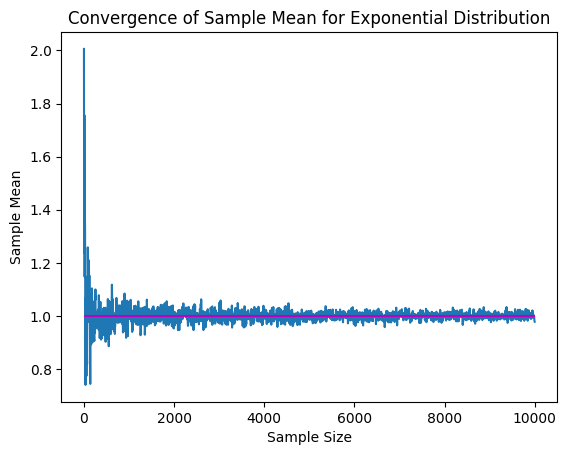

In [3]:
plt.plot(np.arange(1,N,5), sample_means_exp)
plt.hlines(1, 1, N, 'm')
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.title("Convergence of Sample Mean for Exponential Distribution")

We can see that as we increase the sample size the sample mean seems to approach the sample mean.

#### **Example:**  Cauchy Distribution

In [4]:
loc = 0
scale = 1
N = 10000
sample_means_cauchy = [(np.mean(sp.stats.cauchy.rvs(loc, scale, i))) for i in (np.arange(1,N,5))]

Text(0.5, 1.0, 'Convergence of Sample Mean for Cauchy Distribution')

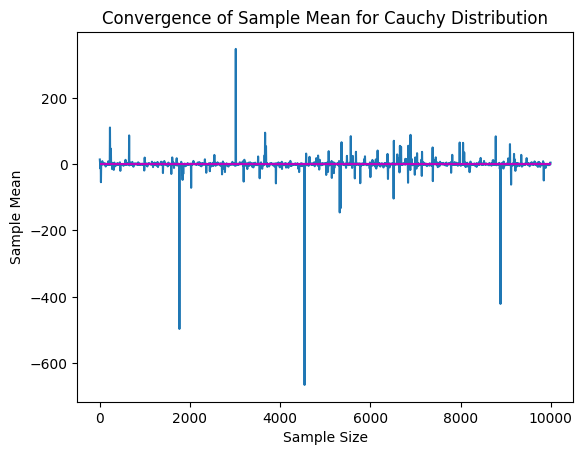

In [5]:
plt.plot(np.arange(1,N,5), sample_means_cauchy)
plt.hlines(0, 1, N, 'm')
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.title("Convergence of Sample Mean for Cauchy Distribution")

We see that the sample means do not look like converging. The reason is that the mean of the Cauchy distribution does not exist, thus the Law of Large Numbers does not hold.

## Central Limit Theorem 

The Central Limit Theorem tells us not only what value the sample mean converges to, but also the limiting distribution.  

### IID Case


Let $X_1,..., X_N$ are i.i.d. randomly distributed random variables with expected value $\mathbb{E}[X] = \mu$ and finite variance  $\sigma^2$. Then

$\sqrt{N}(\bar{X} - \mu) \rightarrow \mathcal{N}(0,\sigma^2)$



#### **Example:** Exponential Distribution

We will demonstrate this with an example of observations from an exponential distribution.

We will generate $M$ samples of size $N$.

In [6]:
M = 1000
N = 1000
scale = 1
sample_means_norm = [(np.mean(np.random.exponential(scale, N)) - scale)*np.sqrt(N)/(scale) for i in range(M)]

In [7]:
# sample_means = [np.mean(np.random.exponential(scale, N)) for i in range(M)]
# plt.hist(sample_means, 100)
# plt.title("Sample Mean Distribution")

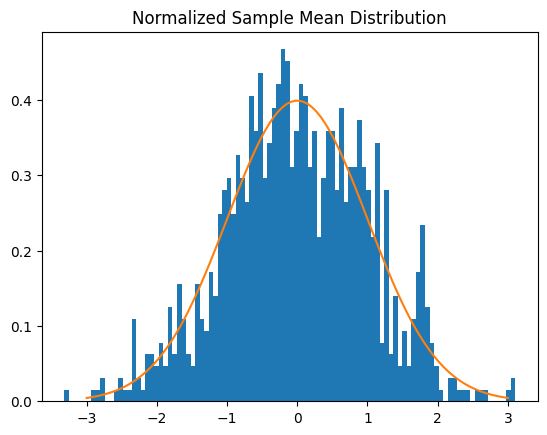

In [8]:
plt.hist(sample_means_norm, 100, density=True)
plt.title("Normalized Sample Mean Distribution")
plt.plot(np.linspace(-3, +3, 100), sp.stats.norm.pdf(np.linspace(-3, +3, 100), 0, 1))

In [9]:
!pip install ipywidgets

In [10]:
def plot_mean_hist(N):
    sample_means_norm = [(np.mean(np.random.exponential(scale, int(N))) - scale)*np.sqrt(N)/(scale) for i in range(M)]
    plt.hist(sample_means_norm, 100, density=True)
    plt.plot(np.linspace(-3, +3, 100), sp.stats.norm.pdf(np.linspace(-3, +3, 100), 0, 1))
    plt.title("Normalized Sample Mean Distribution")
    plt.xlim((-7,7))
    plt.ylim((0,0.5))


In [11]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [12]:
N_slider = widgets.FloatLogSlider(value=100, base=10, min=1, max=5, step=1)
interact(plot_mean_hist, N=N_slider)

interactive(children=(FloatLogSlider(value=100.0, description='N', max=5.0, min=1.0, step=1.0), Output()), _do…

<function __main__.plot_mean_hist(N)>

#### **Example:** Cauchy Distribution

The mean of a sequence of random variables from a standard Cauchy distribution is also a standard Cauchy distribution. 

In [68]:
def plot_mean_hist(N):
    loc = 0
    scale = 1
    sample_means = [np.mean(sp.stats.cauchy.rvs(loc, scale, int(N))) for i in range(M)]
    plt.hist(sample_means, 1000, density=True)
    plt.plot(np.linspace(-100,100,1000), sp.stats.cauchy.pdf(np.linspace(-100, +100, 1000), loc, scale))
    plt.title("Normalized Sample Mean Distribution")
    plt.xlim((-100,100))
    plt.ylim((0,0.5))

In [69]:
M = 1000
N = 1000
loc = 0
scale = 1
sample_means = [(np.mean(sp.stats.cauchy.rvs(loc, scale, N))) for i in range(M)]

(0.0, 0.5)

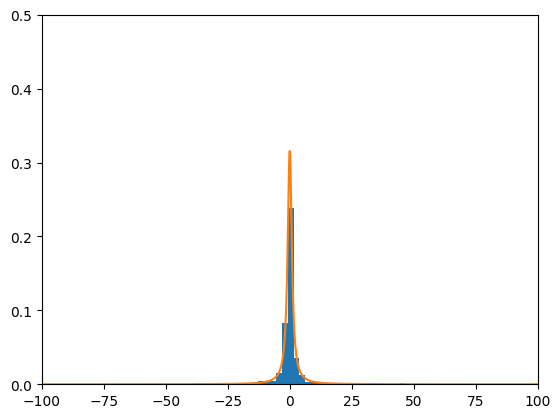

In [70]:
plt.hist(sample_means, 1000, density=True)
plt.plot(np.linspace(-100,100,1000), sp.stats.cauchy.pdf(np.linspace(-100,100,1000), loc, scale))
plt.xlim((-100,100))
plt.ylim((0,0.5))

In [72]:
N_slider = widgets.FloatLogSlider(value=100, base=10, min=1, max=5, step=1)
interact(plot_mean_hist, N=N_slider)

interactive(children=(FloatLogSlider(value=100.0, description='N', max=5.0, min=1.0, step=1.0), Output()), _do…

<function __main__.plot_mean_hist(N)>